Goal of this notebook:

Explore Random Forest hyperparameters to find the best common combination among all projects.

Outputs: 
- Validation curves for each hyperparameter
- Best combination of random forest hyperparameters

In [9]:
import numpy as np
import pandas as pd
from IPython.core.display import display
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestClassifier
import warnings
import classifier_utils
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.impute import SimpleImputer
import math

In [10]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [11]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

In [12]:
df_training = pd.read_csv("../../data/dataset-training.csv")
df_na = df_training[df_training.isna().any(axis=1)]

len(df_na) / len(df_training)

0.28144947636066214

### Base classifier

In [30]:
rf = RandomForestClassifier(random_state=99, n_jobs=5)

In [31]:
result_rf = classifier_utils.ProjectsResults(rf, projects, non_features_columns)

In [32]:
report_rf = result_rf.get_report_df(include_overall=True)
report_rf

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
0,CCI-MIT__XCoLab,5512,3757,0.97000,0.97400,0.97100,0.97400,0.5730,0.93800
1,apache__directory-server,845,652,0.92100,0.92500,0.92300,0.92500,0.5120,0.84600
2,jgralab__jgralab,2072,1802,0.87100,0.87300,0.87100,0.87300,0.4910,0.75100
3,CloudStack-extras__CloudStack-archive,1424,1106,0.80100,0.80700,0.80200,0.80700,0.4370,0.65700
4,Unidata__thredds,1154,950,0.90500,0.91400,0.90600,0.91400,0.7770,0.61300
5,apache__accumulo,4113,3148,0.84700,0.85500,0.85000,0.85500,0.6350,0.60200
6,Ramblurr__Anki-Android,892,759,0.71700,0.74400,0.72400,0.74400,0.4390,0.54500
7,getrailo__railo,815,572,0.69100,0.70500,0.69700,0.70500,0.3780,0.52500
8,apache__lucene-solr,1256,974,0.64300,0.65000,0.64400,0.65000,0.2660,0.52300
9,TeamDev-Ltd__OpenFaces,2979,2859,0.96700,0.97000,0.96800,0.97000,0.9380,0.50600


### Validation curves

- n_estimators: 80, 100, 200, 300, 400
- max_features: auto, sqrt, 0.2
- max_depth: None, 10, 20, 30
- min_samples_leaf: 1,2,3,4
- min_samples_split: 2,3,4,5

##### parameter: n_estimators

n_estimators : int, default=100

The number of trees in the forest.

80, 100, 200, 300, 400

### Overall

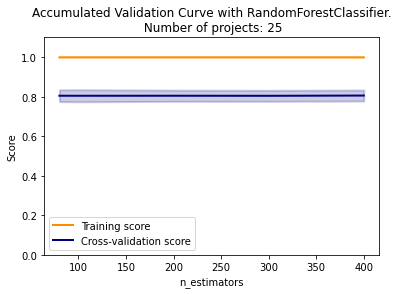

In [33]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf, 'n_estimators',
                                      [80,100,200,300,400],
                                      non_features_columns)

### Per project

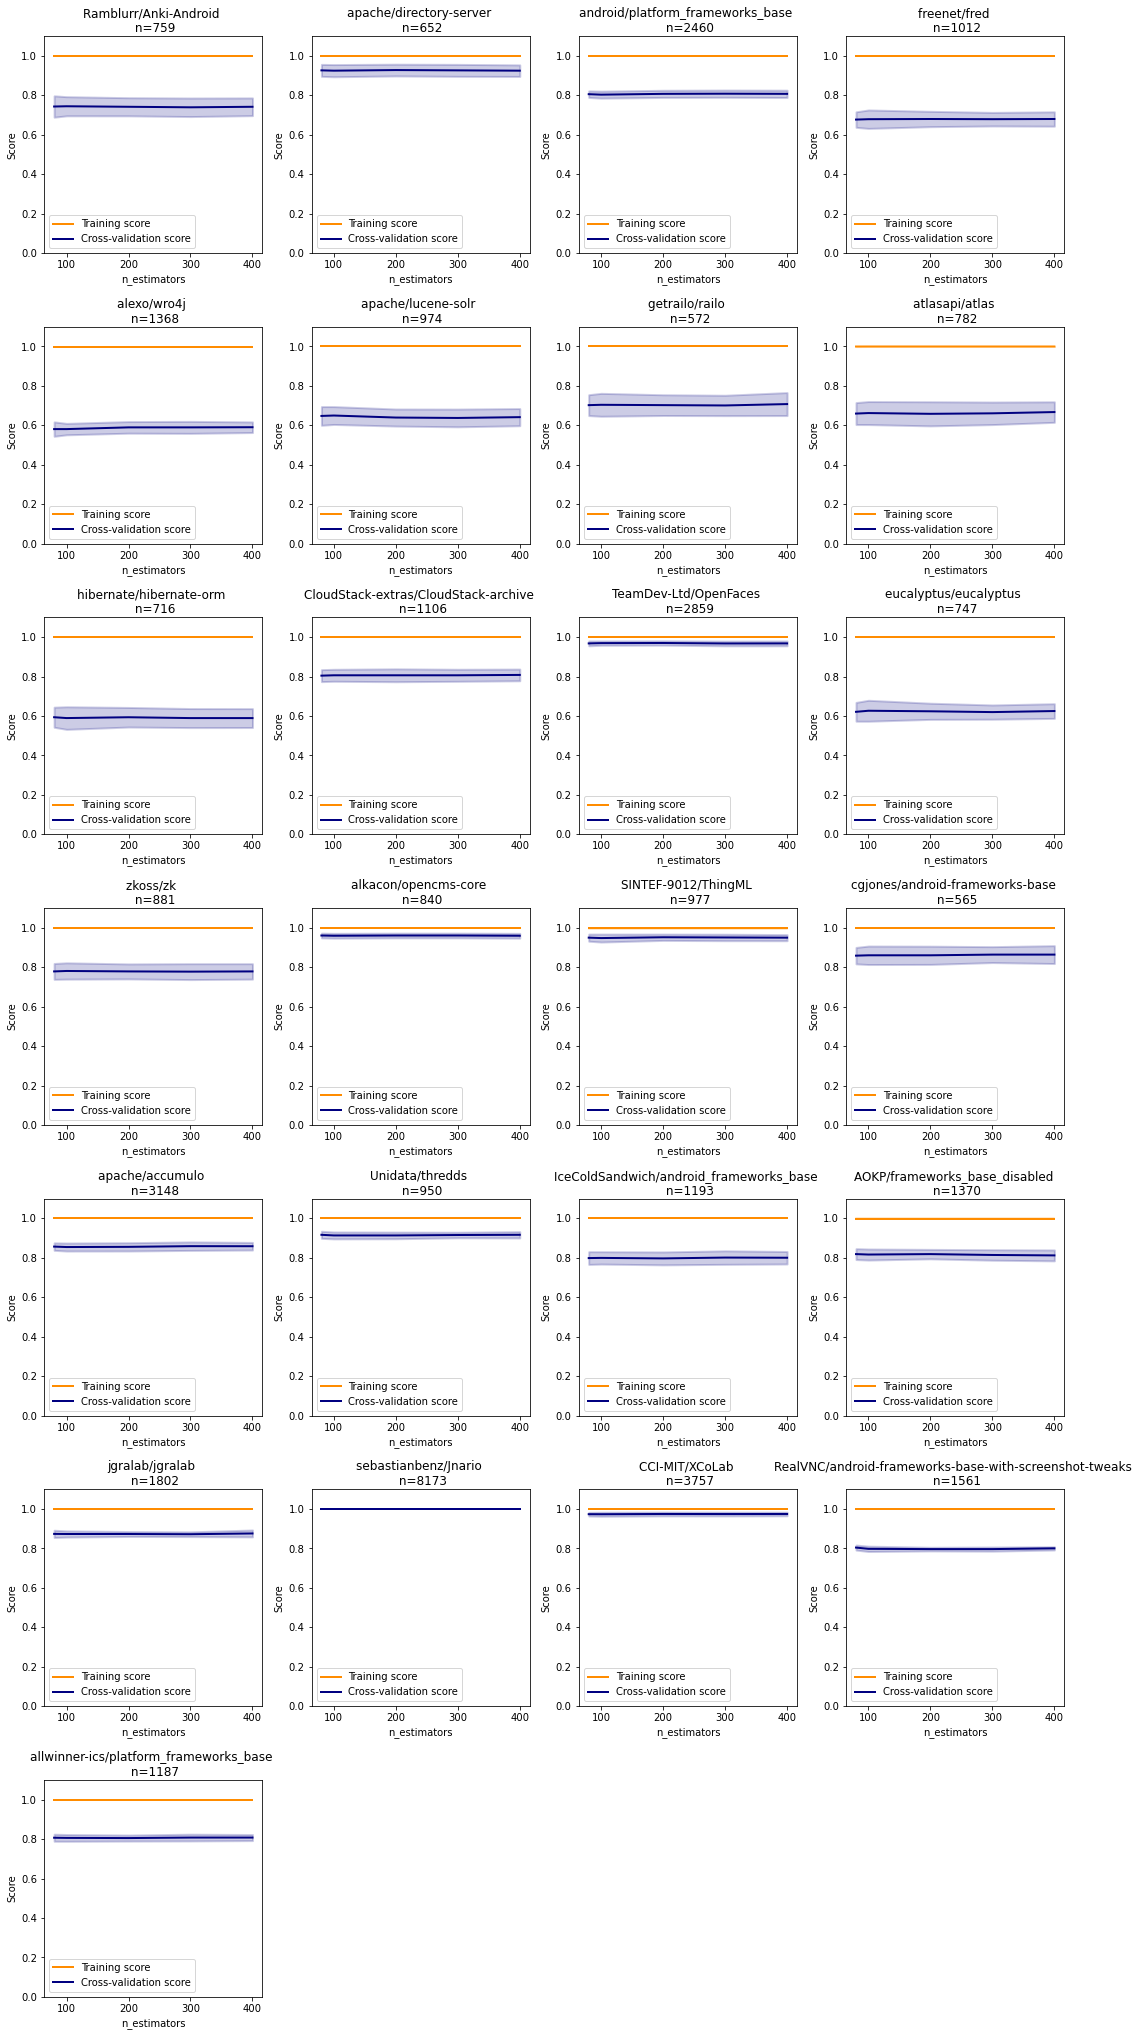

In [34]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf, 'n_estimators',
                                      [80,100,200,300,400],
                                      non_features_columns)

##### max_features

"auto", "sqrt", "log2", int or float, default=”auto”

The number of features to consider when looking for the best split.

Use 0.1, 0.2, 0.3
Include the others in the grid search

### Overall

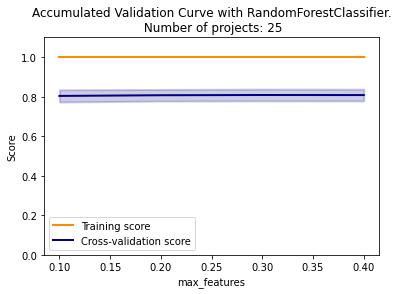

In [35]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf, 'max_features',
                                        np.arange(0.1,0.5,0.1),
                                        non_features_columns)

### Per project

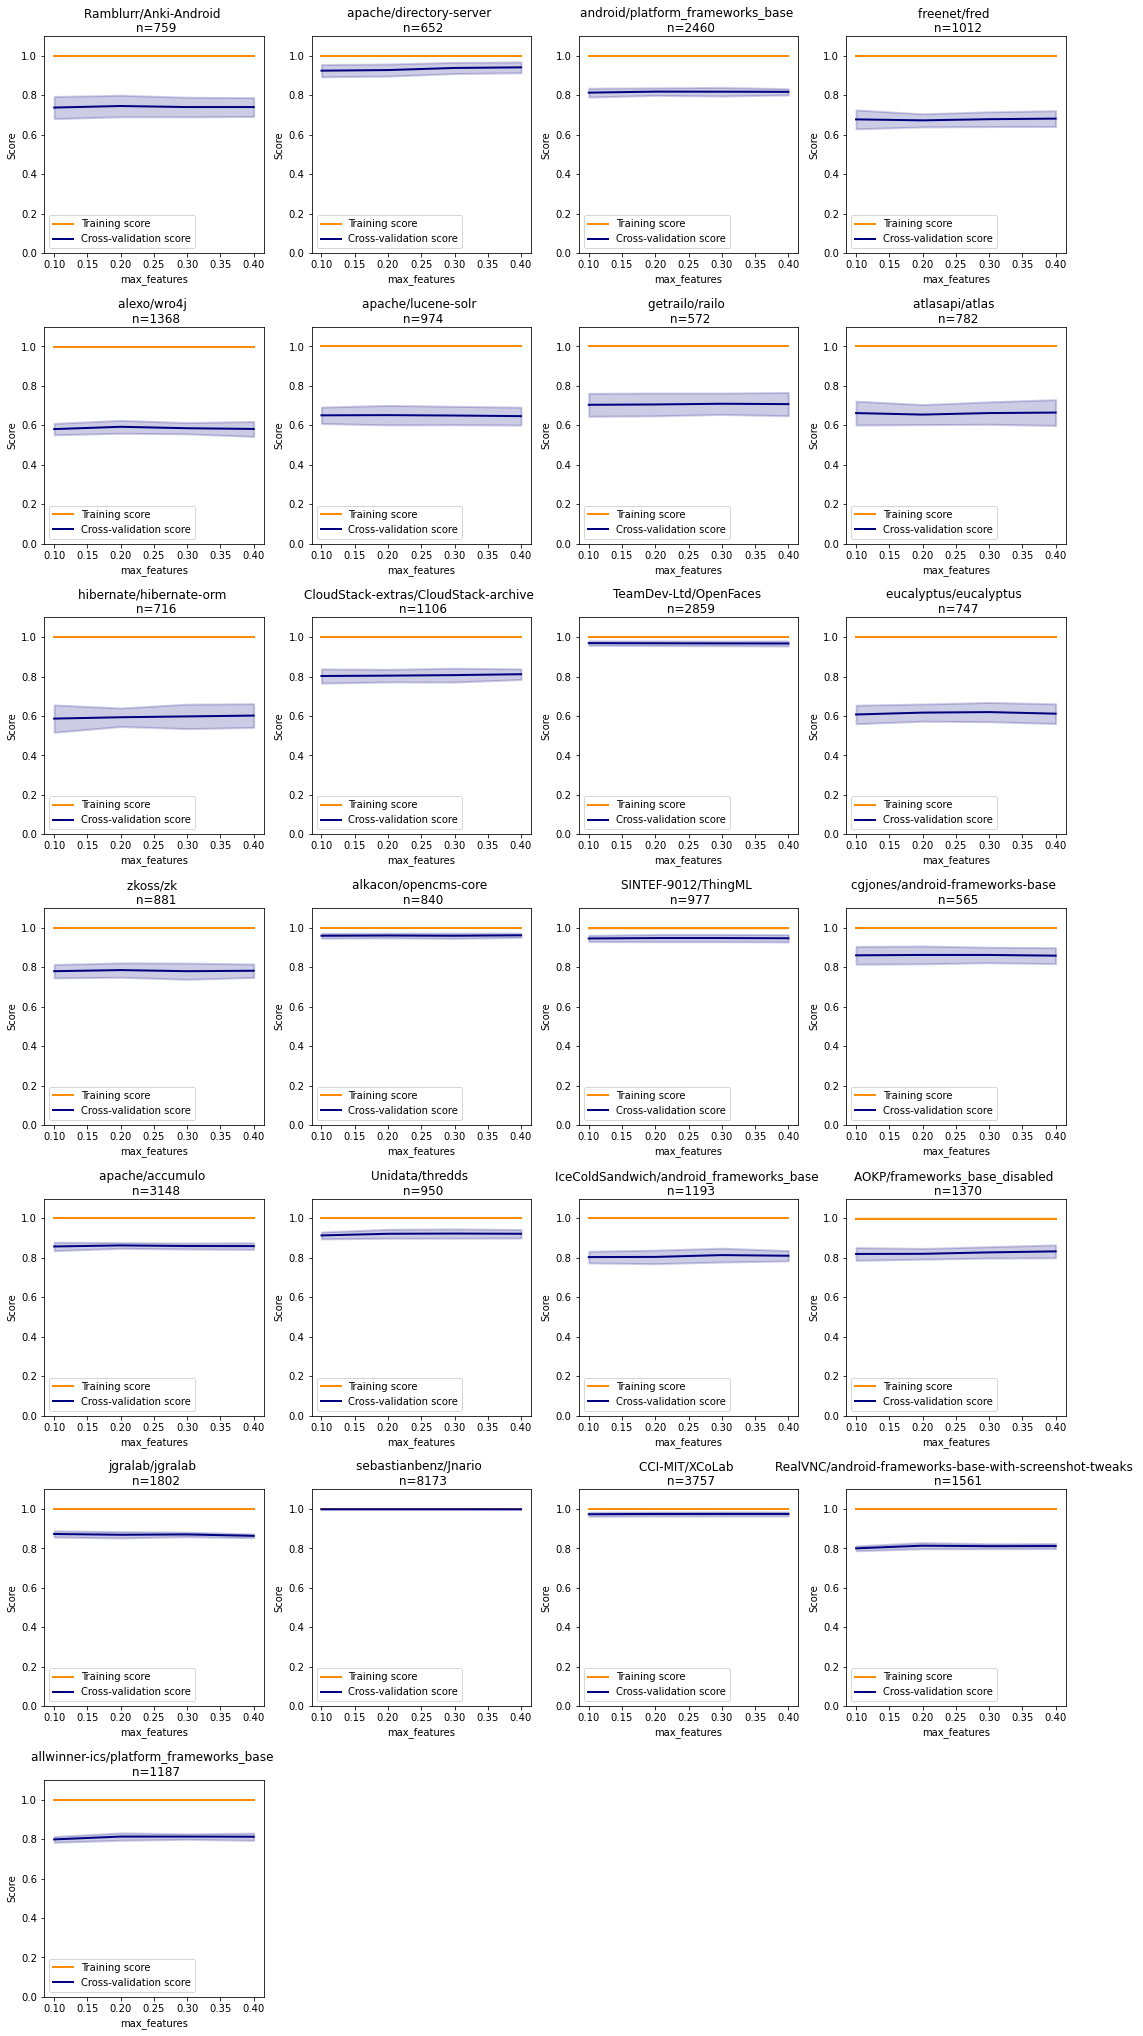

In [36]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf, 'max_features',
                                        np.arange(0.1,0.5,0.1),
                                        non_features_columns)

#### max_depth

max_depth : int, default=None

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
None, 10, 20, 30

### Overall

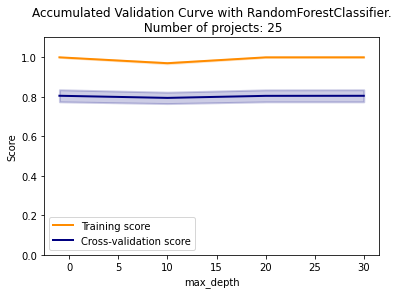

In [37]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf, 'max_depth',
                                        [None, 10,20,30],
                                        non_features_columns)

### Per project

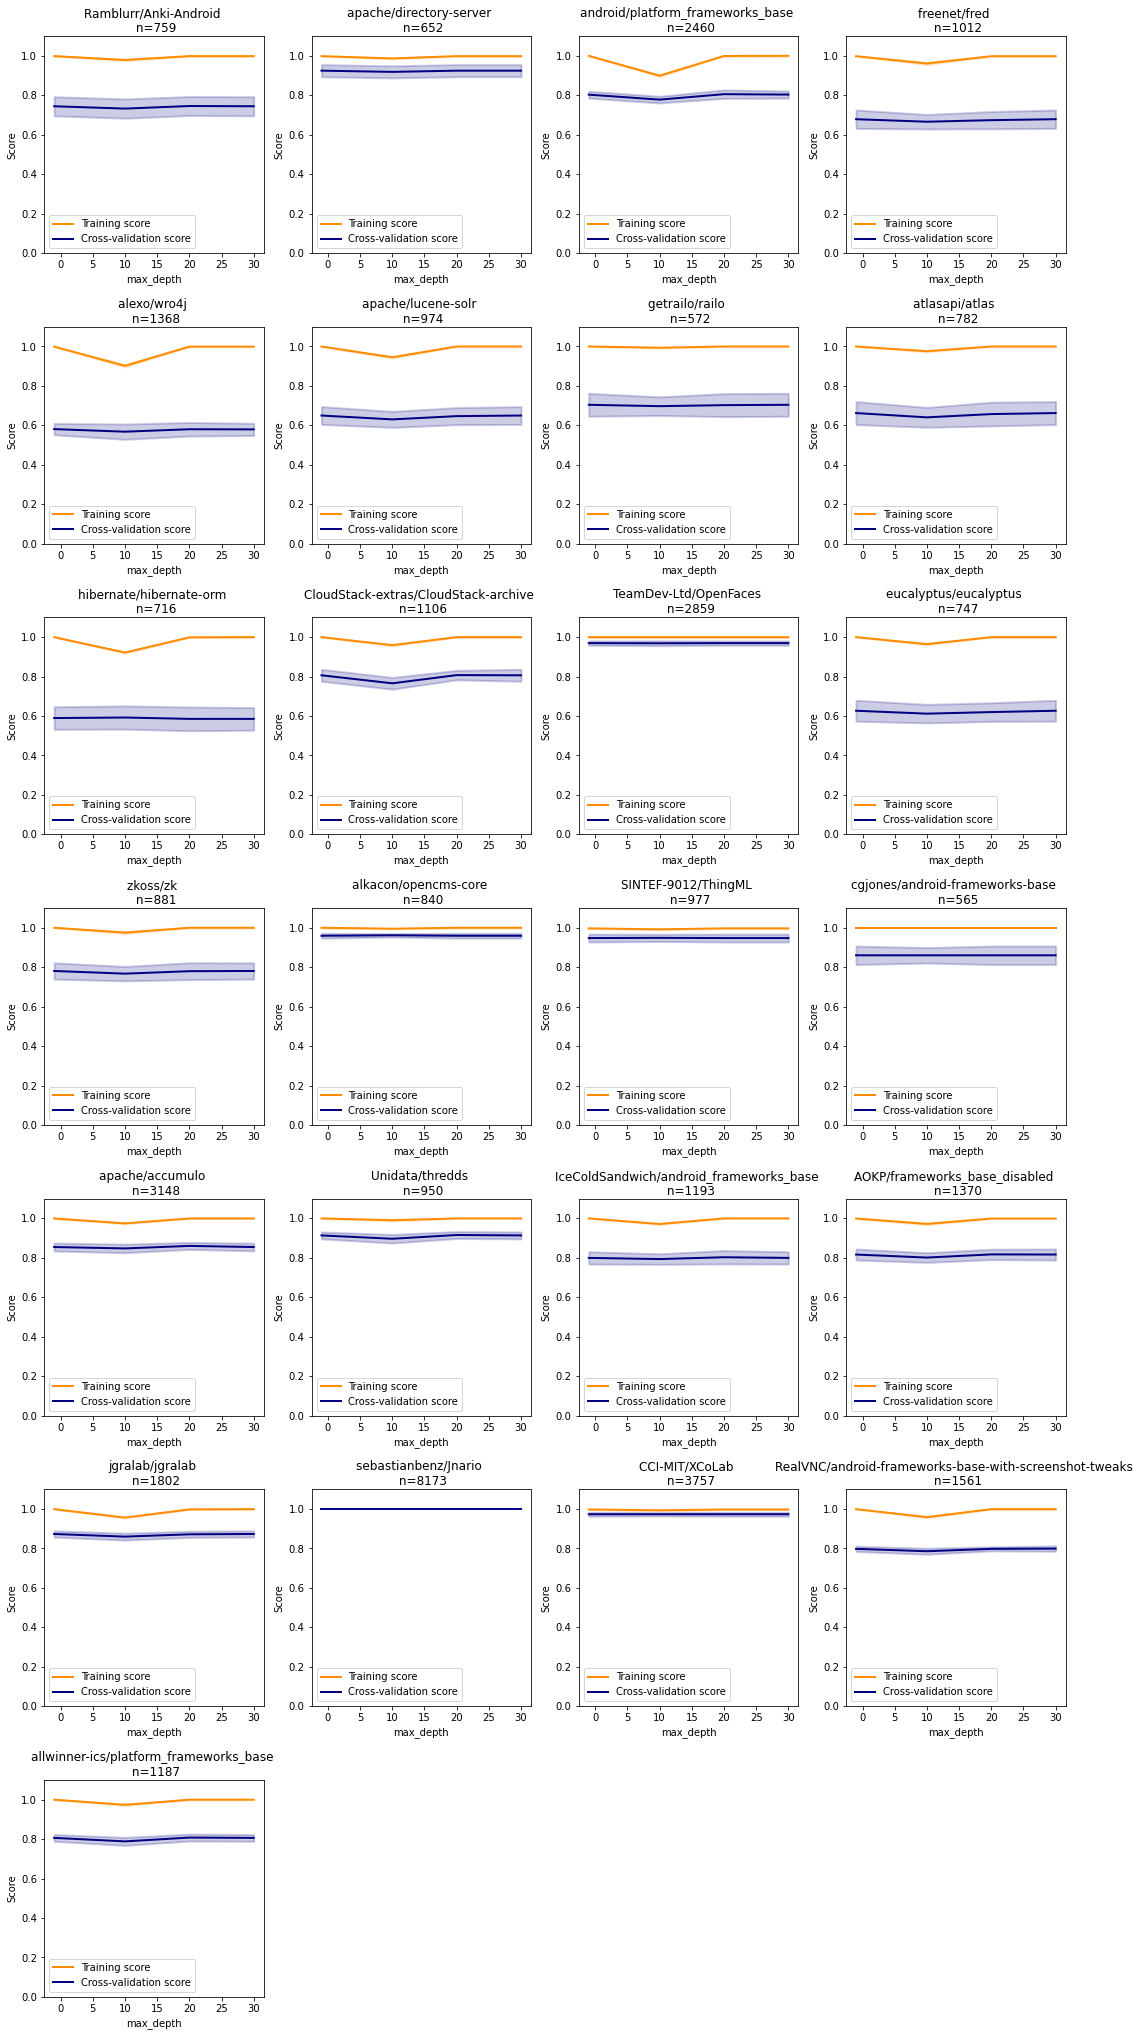

In [38]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf, 'max_depth',
                                        [None, 10,20,30],
                                        non_features_columns)

#### min_samples_leaf

max_depth : int or float, default=1

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. 

1,2,3,4

### Overall

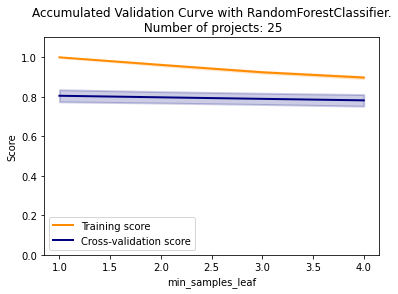

In [39]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf, 'min_samples_leaf',
                                        [1,2,3,4],
                                        non_features_columns)

### Per project

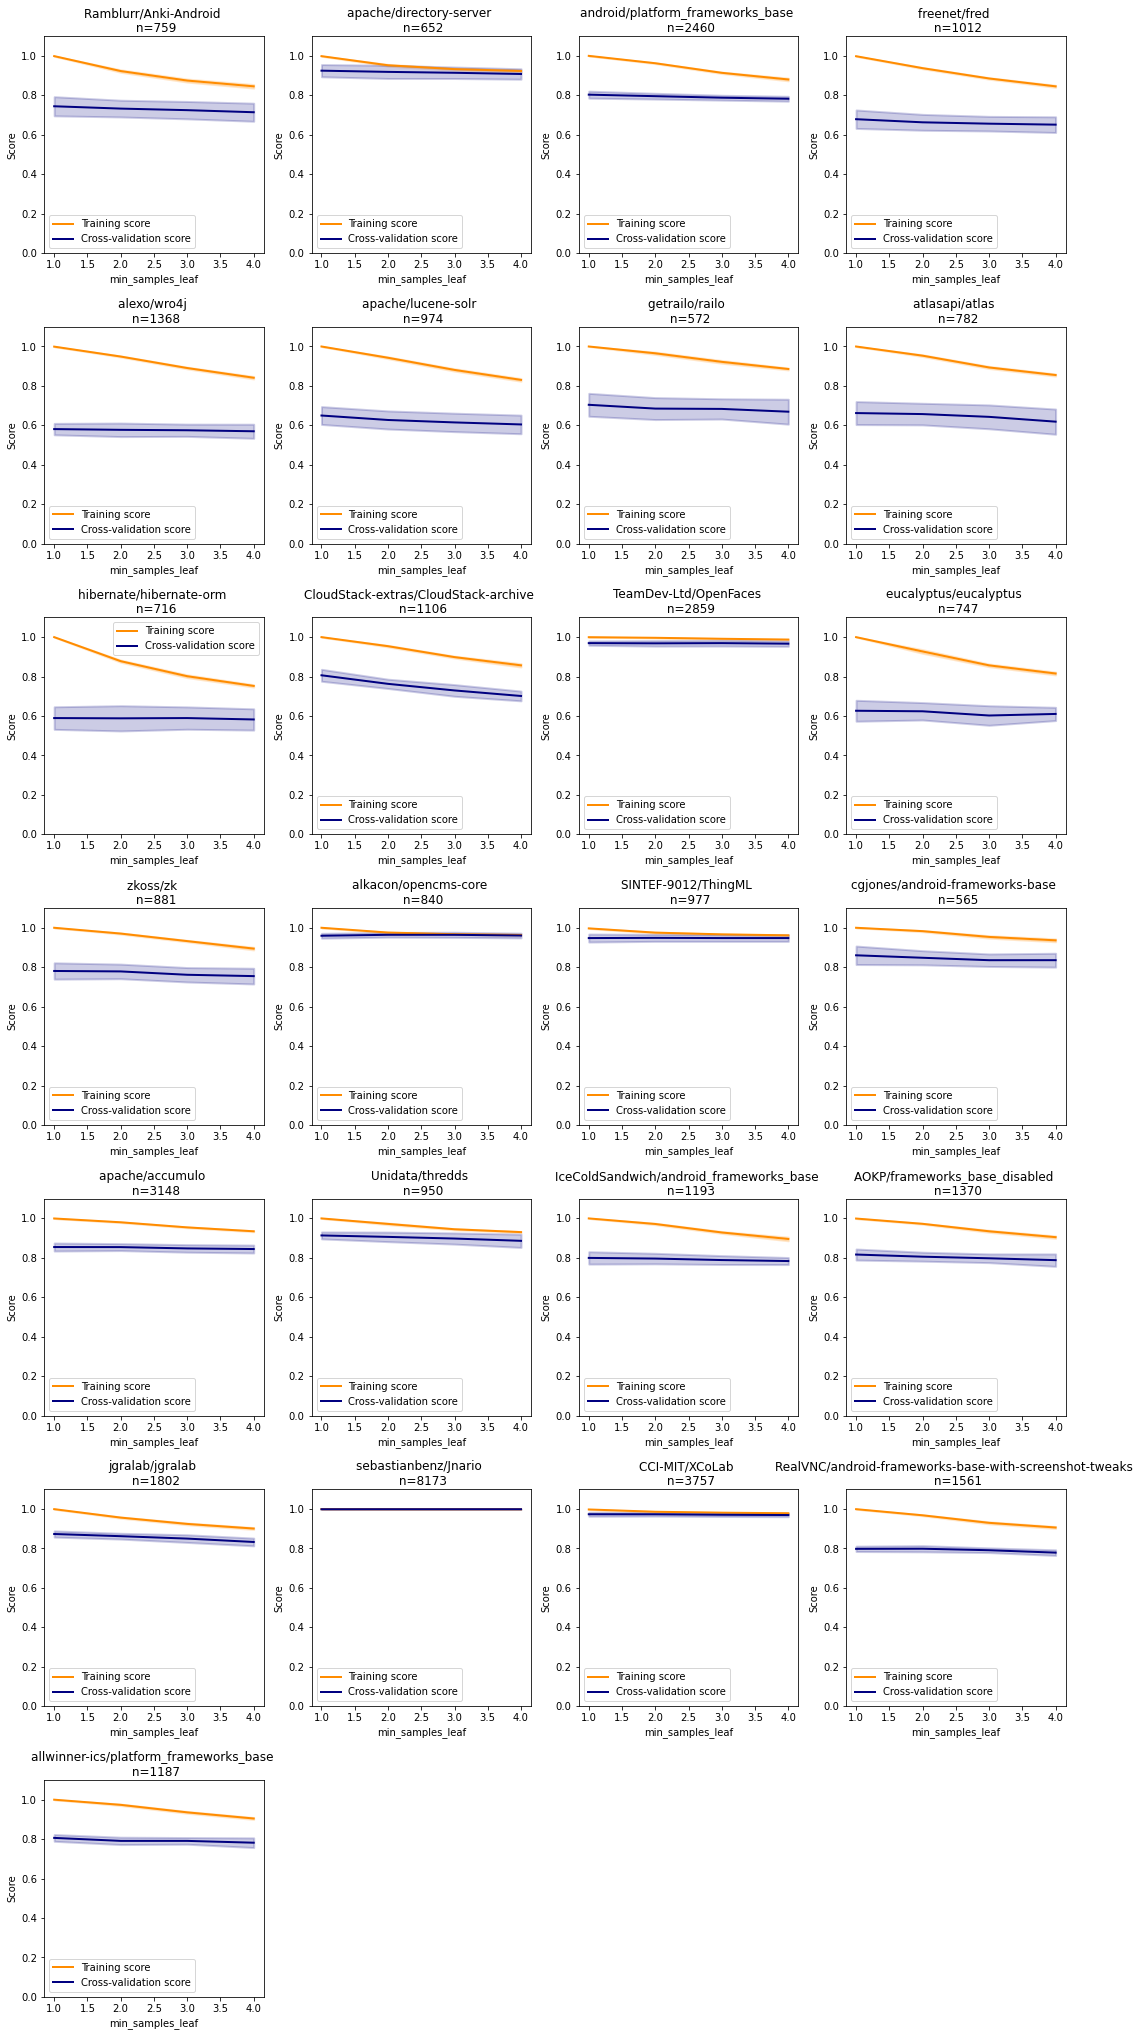

In [40]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf, 'min_samples_leaf',
                                        [1,2,3,4],
                                        non_features_columns)

#### min_samples_split

max_depth : int or float, default=2

The minimum number of samples required to split an internal node

2,3,4,5

### Overall

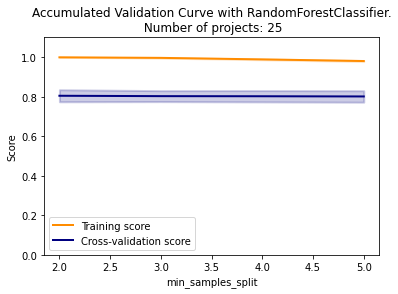

In [41]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf, 'min_samples_split',
                                        [2,3,4,5],
                                        non_features_columns)

### Per project

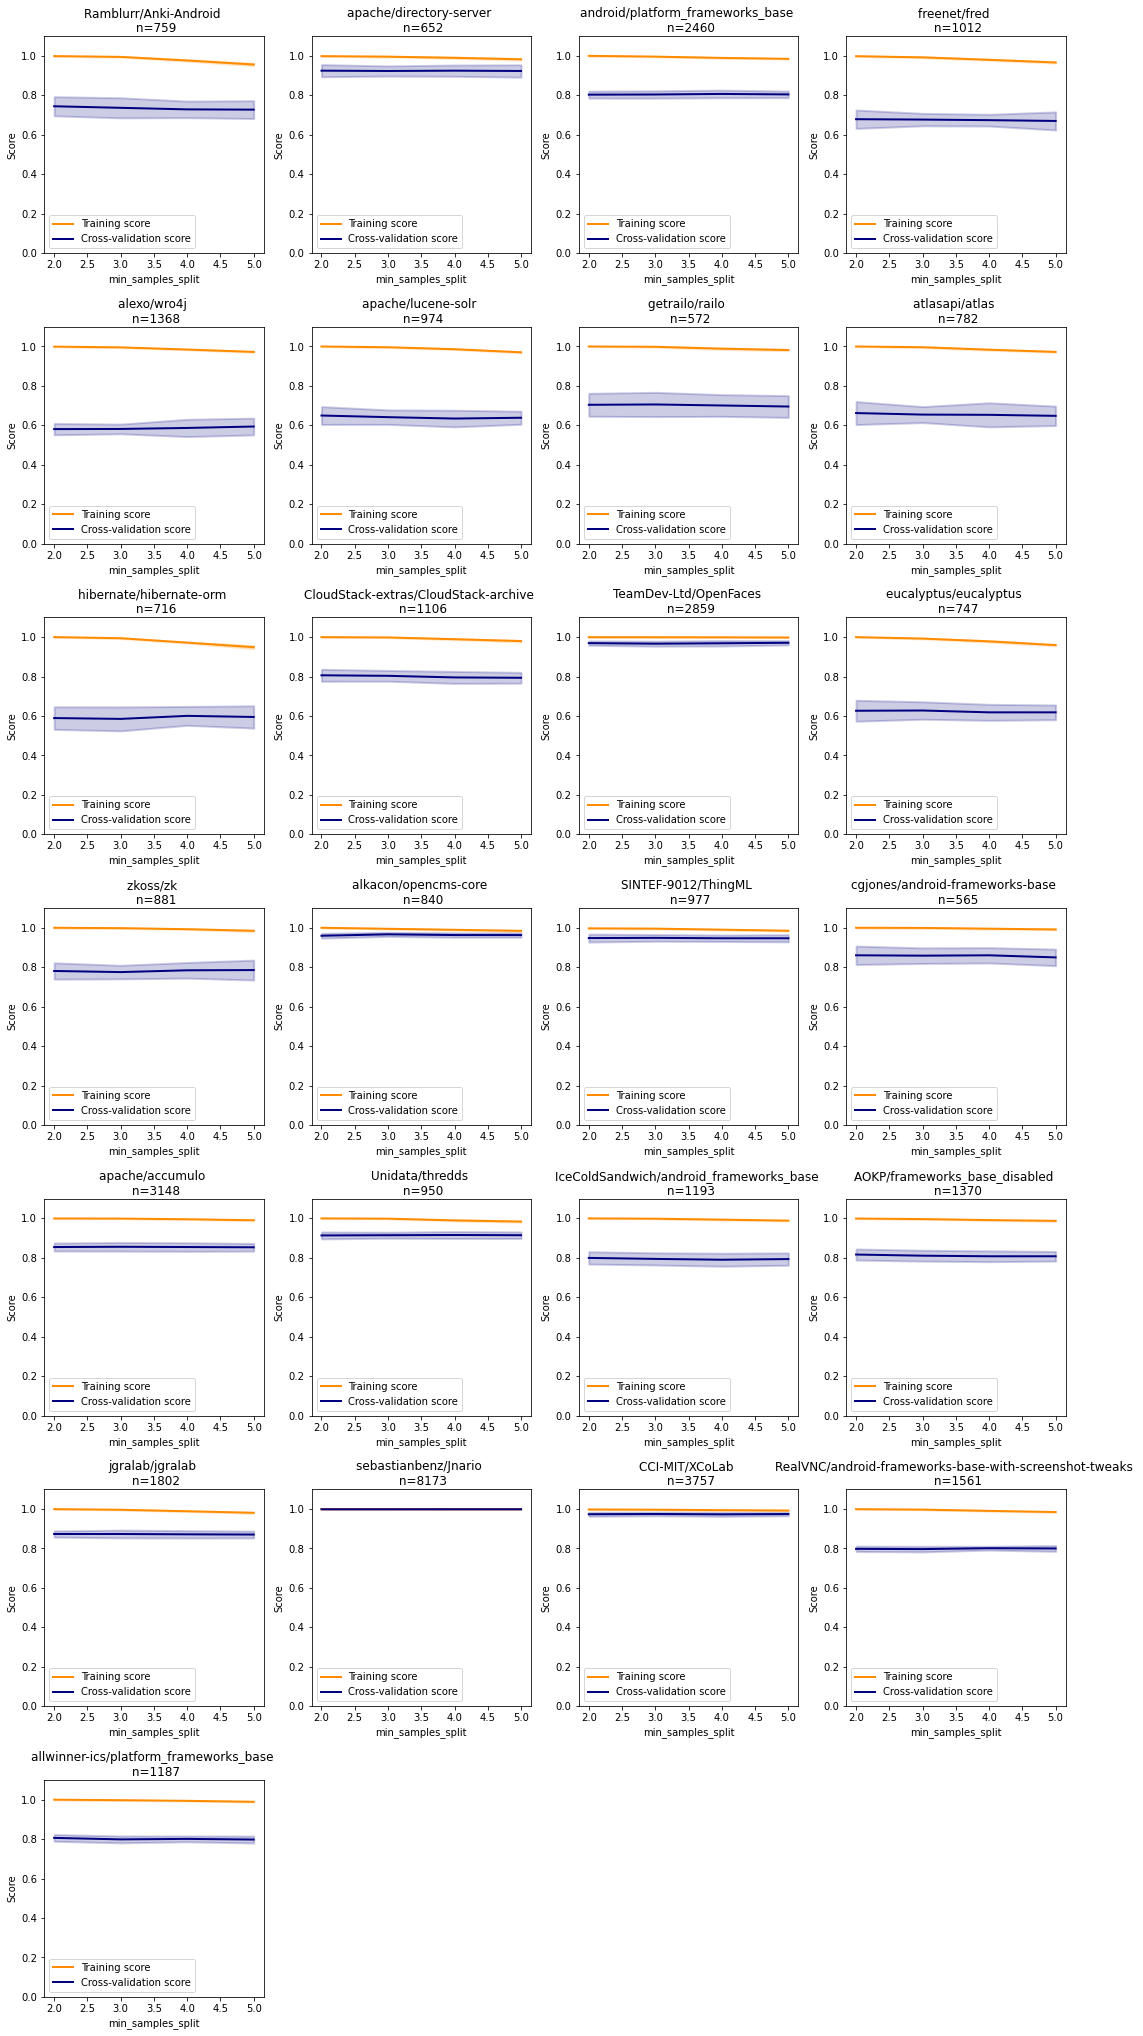

In [42]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf, 'min_samples_split',
                                        [2,3,4,5],
                                        non_features_columns)

### Tuning hyperparameters


Parameters range to explore, according to the validation curves:

- n_estimators: not much visible difference. Use default (100) and 400.
- max_features: Not much visible difference. Use 0.3 and experiment the other values: auto, sqrt, log2.
- max_depth: No variation. Use None as default.
- min_samples_leaf: the training score seems to decrease as the parameter increases. However, the cross-validation score seems to remain constant. Experiment the default value (1), which has the best training score and 4, where the distance between the two curves is smaller.
- min_samples_split: no visible variation. Do not consider in gridsearch

In [79]:
print("Hyperparameters of the Random Forest:")
rf.get_params()

Hyperparameters of the Random Forest:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 5,
 'oob_score': False,
 'random_state': 99,
 'verbose': 0,
 'warm_start': False}

In [70]:
parameters = {'n_estimators':[100,400],
              'max_features':[0.3, 'auto', 'sqrt', 'log2'],
              'min_samples_leaf':[1,4]              
             }

In [71]:
rf = RandomForestClassifier(random_state=99, n_jobs=5)

In [74]:
import importlib
importlib.reload(classifier_utils)
results = classifier_utils.grid_search_all(projects, rf, parameters, non_features_columns)
results.sort_values(['gold_medals', 'silver_medals', 'bronze_medals', 'total_medals'], ascending=False)

,n_estimators,max_features,min_samples_leaf,mean_accuracy,total_medals,gold_medals,silver_medals,bronze_medals
0,100,0.3,1,0.808860,14,7,3,4
10,400,auto,1,0.806102,13,5,2,6
12,400,sqrt,1,0.806102,13,5,2,6
8,400,0.3,1,0.808049,13,4,8,1
2,100,auto,1,0.805035,5,3,1,1
4,100,sqrt,1,0.805035,5,3,1,1
9,400,0.3,4,0.795706,5,3,0,2
6,100,log2,1,0.802602,3,2,1,0
1,100,0.3,4,0.795421,5,2,0,3
14,400,log2,1,0.803604,7,1,1,5


## Comparing the models with the best parameters with the base model

In [75]:
base_model = rf
model_1 = RandomForestClassifier(random_state=99, n_jobs=5, n_estimators=100, max_features=0.3, min_samples_leaf=1)
model_2 = RandomForestClassifier(random_state=99, n_jobs=5, n_estimators=400, max_features='auto', min_samples_leaf=1)
model_3 = RandomForestClassifier(random_state=99, n_jobs=5, n_estimators=400, max_features=0.3, min_samples_leaf=1)

In [76]:
models = [base_model, model_1, model_2, model_3]
models_names = ['base', 'model1', 'model2', 'model3']
import importlib
importlib.reload(classifier_utils)
comparison = classifier_utils.compare_models(models, models_names, projects, non_features_columns)

C:\Users\HelenoCampos\Dropbox\SHARED_PC_LAB\Doutorado\colaboracao\conflicts_classifier\conflict-resolution-mining\scripts\classifier\classifier_utils.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['model'] = None


In [77]:
comparison.filter(regex=("model|accuracy|precision|recall")).sort_values(['accuracy'], ascending=False)

,precision,recall,accuracy,model
1,0.79908,0.80888,0.80888,model1
3,0.79800,0.80804,0.80804,model3
2,0.79136,0.80616,0.80616,model2
0,0.79036,0.80508,0.80508,base
